In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
city_data_to_load = os.path.join('..', 'Resources', 'city_data.csv')

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [7]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [8]:
# screening for city_data_df
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
types = list(city_data_df['type'].unique())
dict_types = {}
for i in types:
    dict_types[i]=sum(city_data_df['type']==i)

dict_types

{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [12]:
# screening for ride_data_df
ride_data_df.count()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

In [15]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#create seperate df for each city
urban_cities_df= pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df= pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df= pyber_data_df[pyber_data_df['type']=='Rural']

In [17]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [18]:
# get the total number of riders by city type
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [19]:
# get the average fare by city type
urban_cities_average_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_cities_average_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_cities_average_fare = rural_cities_df.groupby('city').mean()['fare']

In [20]:
# get the average number of drivers by city type
urban_cities_drivers = urban_cities_df.groupby('city').mean()['driver_count']
suburban_cities_drivers = suburban_cities_df.groupby('city').mean()['driver_count']
rural_cities_drivers = rural_cities_df.groupby('city').mean()['driver_count']

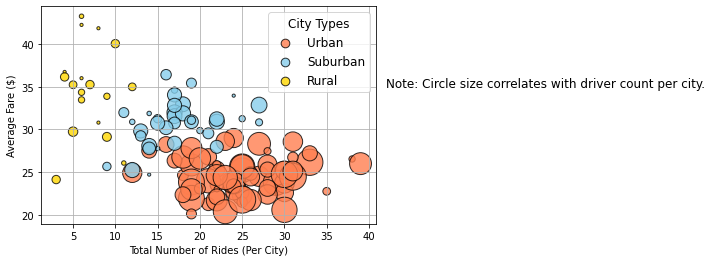

In [21]:
# create the bubble chart 
fig, ax = plt.subplots()
ax.scatter(urban_ride_count, 
           urban_cities_average_fare, 
           s=10*urban_cities_drivers, 
           label='Urban', c = 'coral',
           alpha = 0.8,
           edgecolor='black',
           linewidth=1)

ax.scatter(suburban_ride_count, 
           suburban_cities_average_fare, 
           s=10*suburban_cities_drivers, label = 'Suburban',
           c = 'skyblue',
           alpha = 0.8,
           edgecolor='black',
           linewidth=1)

ax.scatter(rural_ride_count, 
           rural_cities_average_fare, 
           s=10*rural_cities_drivers, label = 'Rural',
           c = 'gold',
           alpha = 0.8,
           edgecolor='black',
           linewidth=1)
plt.grid()
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# modify legend 
lgnd = plt.legend(fontsize="12", 
                  mode="Expanded",
                  scatterpoints=1, 
                  loc="best", 
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig("analysis/Fig1.png")
plt.show()


In [22]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [23]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [24]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [25]:
round(urban_ride_count.median())

24

In [26]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [27]:
suburban_ride_count.mode()

0    17
dtype: int64

In [28]:
rural_ride_count.mode()

0    6
dtype: int64

In [29]:
import numpy as np
import scipy.stats as sts

In [30]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [31]:
mode_urban_ride_count = sts.mode(urban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

In [32]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [33]:
mean_urban_fares = np.mean(urban_fares)
mean_suburban_fares = np.mean(suburban_fares)
mean_rural_fares = np.mean(rural_fares)


In [34]:
print('the highest average fare is: ', max(mean_urban_fares, mean_suburban_fares, mean_rural_fares))

the highest average fare is:  34.623440000000016


In [35]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [36]:
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [37]:
# create box and whisker plots 

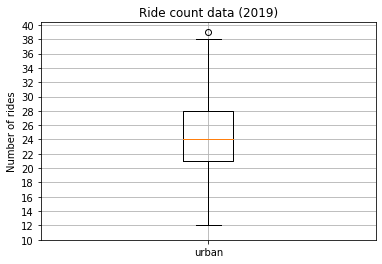

In [38]:
fig, ax = plt.subplots()
xlabels = ['urban']
ax.boxplot(urban_ride_count, labels =xlabels)
plt.title('Ride count data (2019)')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(10, 41, 2))
ax.grid()
plt.show()

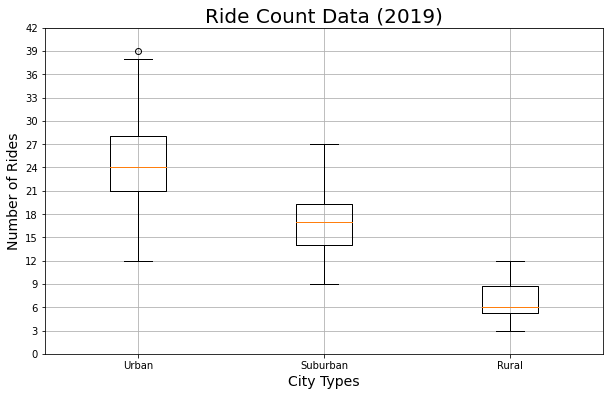

In [39]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [40]:
# Pie Charts

In [41]:
# To create this pie chart, we will need to do the following:

##     Get the total fares for each city type.
##     Get the total for all the fares for all the city types.
##     Calculate the percentage of the total fares for each city type.


In [42]:
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [90]:
# Get the sum of the fares for each city type.
total_fare_by_type = pyber_data_df.groupby('type')['fare'].sum()
# Get total sum of fares 
total_fare_sum = pyber_data_df['fare'].sum()
# Calculate percentage 
type_percents = total_fare_by_type / total_fare_sum *100

In [91]:
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

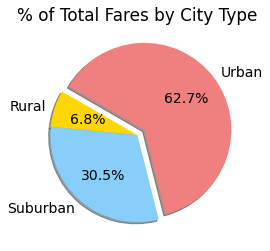

In [109]:
import matplotlib as mpl

plt.pie(type_percents, 
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       shadow=True, 
       autopct='%1.1f%%',
       startangle=150)
#labels from the boxplot graph
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
plt.show()
